# EE4211 Group 9 Question 2

### Question 2.1

**In this part, you will build a model to forecast the hourly carpark availability in the future
(aggregated across all carparks instead of looking at each carpark individually). Can you
explain why you may want to forecast the carpark availability in the future? Who would
find this information valuable? What can you do if you have a good forecasting model?**


This would help commuters easily identify available carparks they can use and easily plan their route and schedule ahead of time. At the same time, by being able to forecast availability of carparks, developers can identify hotspots where there may often be high usage of car parks and thus a good location to build more lots or carparks to cater to the high demand. In contrast, they can also identify potential spots where space which is a constraint in SG, can be saved by reducing the number of lots or carparks that don't have high usage forecasted. Event organisers can also plan their events around where there would be high percentage of free carparks through analysing this forecasting model.

In [1]:
import requests
import json
import datetime
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def get_data(num_days, month, month_data, minutes, second_str, file_title):
    for day in range(1, num_days + 1):
        day_str = str(day)
        for hour in range(0, 24):
            hour_str = str(hour)
            site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day_str.zfill(2)}T{hour_str.zfill(2)}%3A{minutes.zfill(2)}%3A{second_str.zfill(2)}'
#             print(site)
            response_API = requests.get(site)
            data = response_API.text
            data = json.loads(data)
            if(not "items" in data):
                continue
            timestamp = data["items"][0]["timestamp"]
            print(timestamp)

            data = data["items"][0]["carpark_data"]
            
            with open(file_title, 'r') as fp:
                json_file = json.load(fp)
                
            json_file.append(data)
            
            with open(file_title, 'w') as fp:
                json.dump(data, fp)
            dt = (pd.read_json(file_title))
            for heading in ("total_lots","lot_type","lots_available"):
                dt[heading] = dt["carpark_info"].apply(lambda x: x[0][heading])
            dt = dt.drop(["carpark_info"], axis=1)
            month_data = month_data.append(dt)

# only to be run once
# to replicate the code and store data in a file, uncomment the line below
#     csv_title = month + "_data_Q2.csv"
#     month_data.to_csv(csv_title, index = False)
#     month_data

In [ ]:
year = "2022"
second_str = "50"
num_days = 31
month = "7"
minutes = "59"

file_title = "EE4211_data_" + month + ".json"

jul_data = pd.DataFrame()

get_data(num_days, month, jul_data, minutes, second_str, file_title)

2022-07-01T00:59:27+08:00
2022-07-01T02:59:27+08:00
2022-07-01T03:59:27+08:00
2022-07-01T06:59:27+08:00
2022-07-01T08:58:27+08:00
2022-07-01T10:59:27+08:00
2022-07-01T11:59:26+08:00
2022-07-01T12:58:27+08:00
2022-07-01T16:59:27+08:00
2022-07-01T17:59:27+08:00
2022-07-01T18:58:27+08:00
2022-07-01T19:59:27+08:00
2022-07-01T20:59:27+08:00
2022-07-01T21:59:27+08:00
2022-07-01T23:59:27+08:00
2022-07-02T00:59:27+08:00
2022-07-02T02:59:27+08:00
2022-07-02T04:59:27+08:00
2022-07-02T10:59:27+08:00
2022-07-02T11:59:27+08:00
2022-07-02T15:59:27+08:00
2022-07-02T16:59:27+08:00
2022-07-02T18:59:26+08:00
2022-07-03T02:59:27+08:00
2022-07-03T05:59:27+08:00
2022-07-03T06:59:27+08:00
2022-07-03T07:59:27+08:00
2022-07-03T09:59:26+08:00
2022-07-03T10:59:27+08:00
2022-07-03T11:59:27+08:00
2022-07-03T16:59:27+08:00
2022-07-03T23:59:27+08:00
2022-07-04T02:59:27+08:00
2022-07-04T04:59:27+08:00
2022-07-04T05:59:27+08:00
2022-07-04T06:59:27+08:00
2022-07-04T08:59:27+08:00
2022-07-04T13:59:27+08:00
2022-07-04T1

2022-07-16T15:59:27+08:00
2022-07-16T16:59:27+08:00
2022-07-16T17:59:27+08:00
2022-07-16T18:59:27+08:00
2022-07-16T19:59:27+08:00
2022-07-16T20:59:27+08:00
2022-07-16T21:59:27+08:00
2022-07-16T22:59:27+08:00
2022-07-16T23:59:27+08:00
2022-07-17T00:59:27+08:00
2022-07-17T01:59:27+08:00
2022-07-17T02:59:27+08:00
2022-07-17T03:59:27+08:00
2022-07-17T04:59:27+08:00
2022-07-17T05:59:27+08:00
2022-07-17T06:59:27+08:00
2022-07-17T07:59:27+08:00
2022-07-17T08:59:27+08:00
2022-07-17T09:59:27+08:00
2022-07-17T10:59:27+08:00
2022-07-17T11:59:27+08:00
2022-07-17T12:59:27+08:00
2022-07-17T13:59:27+08:00
2022-07-17T14:59:27+08:00
2022-07-17T15:59:27+08:00
2022-07-17T16:59:27+08:00
2022-07-17T17:59:27+08:00
2022-07-17T18:59:27+08:00
2022-07-17T19:59:27+08:00
2022-07-17T20:59:27+08:00
2022-07-17T21:59:27+08:00
2022-07-17T22:59:27+08:00
2022-07-17T23:59:27+08:00
2022-07-18T00:59:27+08:00
2022-07-18T01:59:27+08:00
2022-07-18T02:59:27+08:00
2022-07-18T03:59:27+08:00
2022-07-18T04:59:27+08:00
2022-07-18T0

2022-07-29T21:59:27+08:00
2022-07-29T22:59:27+08:00
2022-07-29T23:59:27+08:00
2022-07-30T00:59:27+08:00
2022-07-30T01:59:27+08:00
2022-07-30T02:59:28+08:00
2022-07-30T03:59:27+08:00
2022-07-30T04:59:27+08:00
2022-07-30T05:59:27+08:00
2022-07-30T06:59:26+08:00
2022-07-30T07:59:27+08:00
2022-07-30T08:59:27+08:00
2022-07-30T09:59:27+08:00
2022-07-30T10:59:27+08:00
2022-07-30T11:59:26+08:00
2022-07-30T12:59:27+08:00
2022-07-30T13:59:26+08:00
2022-07-30T14:59:27+08:00
2022-07-30T15:59:27+08:00
2022-07-30T16:59:27+08:00
2022-07-30T17:59:27+08:00
2022-07-30T18:59:27+08:00
2022-07-30T19:59:27+08:00
2022-07-30T20:59:27+08:00
2022-07-30T21:59:27+08:00
2022-07-30T22:59:27+08:00
2022-07-30T23:59:27+08:00
2022-07-31T00:59:27+08:00
2022-07-31T01:59:27+08:00
2022-07-31T02:59:27+08:00
2022-07-31T03:59:27+08:00
2022-07-31T04:59:27+08:00
2022-07-31T06:59:27+08:00
2022-07-31T07:59:27+08:00
2022-07-31T08:59:27+08:00
2022-07-31T09:59:27+08:00
2022-07-31T10:59:26+08:00
2022-07-31T11:59:27+08:00
2022-07-31T1

In [ ]:
year = "2022"
second_str = "59"
num_days = 31
month = "8"
minutes = "30"

file_title = "EE4211_data_" + month + ".json"

aug_data = pd.DataFrame()

get_data(num_days, month, aug_data, minutes, second_str, file_title)

2022-08-01T00:30:27+08:00
2022-08-01T01:30:27+08:00
2022-08-01T02:30:27+08:00
2022-08-01T03:30:27+08:00
2022-08-01T04:30:26+08:00
2022-08-01T05:30:27+08:00
2022-08-01T06:30:27+08:00
2022-08-01T07:30:30+08:00
2022-08-01T08:30:27+08:00
2022-08-01T09:30:27+08:00
2022-08-01T10:30:27+08:00
2022-08-01T11:30:27+08:00
2022-08-01T12:30:27+08:00
2022-08-01T13:30:27+08:00
2022-08-01T14:30:27+08:00
2022-08-01T15:30:27+08:00
2022-08-01T16:30:27+08:00
2022-08-01T17:30:27+08:00
2022-08-01T18:30:27+08:00
2022-08-01T19:30:27+08:00
2022-08-01T20:30:27+08:00
2022-08-01T21:30:27+08:00
2022-08-01T22:30:27+08:00
2022-08-01T23:30:27+08:00
2022-08-02T00:30:27+08:00
2022-08-02T01:30:27+08:00
2022-08-02T02:30:27+08:00
2022-08-02T03:30:27+08:00
2022-08-02T04:30:27+08:00
2022-08-02T05:30:27+08:00
2022-08-02T06:30:27+08:00
2022-08-02T07:30:27+08:00
2022-08-02T08:30:27+08:00
2022-08-02T09:30:27+08:00
2022-08-02T11:30:27+08:00
2022-08-02T12:30:27+08:00
2022-08-02T13:30:27+08:00
2022-08-02T14:30:27+08:00
2022-08-02T1

2022-08-18T11:30:27+08:00
2022-08-18T12:30:27+08:00
2022-08-18T13:30:27+08:00
2022-08-18T14:30:27+08:00
2022-08-18T15:30:27+08:00
2022-08-18T16:30:26+08:00
2022-08-18T17:30:27+08:00
2022-08-18T18:30:27+08:00
2022-08-18T19:30:27+08:00
2022-08-18T20:30:27+08:00
2022-08-18T21:30:27+08:00
2022-08-18T22:30:27+08:00
2022-08-18T23:30:27+08:00
2022-08-19T00:30:27+08:00
2022-08-19T01:30:27+08:00
2022-08-19T02:30:27+08:00
2022-08-19T03:30:27+08:00
2022-08-19T04:30:27+08:00
2022-08-19T05:30:27+08:00
2022-08-19T06:30:27+08:00
2022-08-19T07:30:27+08:00
2022-08-19T08:30:27+08:00
2022-08-19T09:30:27+08:00
2022-08-19T10:30:26+08:00
2022-08-19T11:30:27+08:00
2022-08-19T12:30:27+08:00
2022-08-19T13:30:26+08:00
2022-08-19T14:30:27+08:00
2022-08-19T15:30:27+08:00
2022-08-19T16:30:27+08:00
2022-08-19T17:30:27+08:00
2022-08-19T18:30:27+08:00
2022-08-19T19:30:27+08:00
2022-08-19T20:30:27+08:00
2022-08-19T21:30:27+08:00
2022-08-19T22:30:27+08:00
2022-08-19T23:30:27+08:00
2022-08-20T00:30:27+08:00
2022-08-20T0

2022-08-31T16:30:27+08:00
2022-08-31T17:30:27+08:00
2022-08-31T18:30:27+08:00
2022-08-31T19:30:27+08:00
2022-08-31T20:30:27+08:00
2022-08-31T21:30:27+08:00
2022-08-31T22:30:27+08:00
2022-08-31T23:30:27+08:00


In [ ]:
# Sample that just imports from json
with open('EE4211_data_7.json', 'r') as f:
    jul_data = json.load(f)
jul_data

In [ ]:
# Sample that just imports from json
with open('EE4211_data_8.json', 'r') as f:
    aug_data = json.load(f)
aug_data

## Data Cleaning

In [3]:
jul_data_df = pd.read_csv('7_data_Q2.csv')
jul_data_df

,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2022-06-30T23:00:59,105,C,56
1,HLM,2022-07-01T00:58:55,583,C,482
2,RHM,2022-06-30T23:00:59,329,C,134
3,BM29,2022-07-01T00:58:59,97,C,82
4,Q81,2022-07-01T00:58:54,96,C,75
...,...,...,...,...,...
1341969,B65M,2022-07-31T23:54:33,679,C,330
1341970,B65L,2022-07-31T23:54:33,5,C,1
1341971,BE3,2022-07-31T23:53:33,306,C,54
1341972,BE3R,2022-07-31T23:53:33,195,C,71


In [4]:
aug_data_df = pd.read_csv('8_data_Q2.csv')
aug_data_df

,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2022-08-01T00:29:09,105,C,61
1,HLM,2022-08-01T00:29:03,583,C,502
2,RHM,2022-08-01T00:29:09,329,C,119
3,BM29,2022-08-01T00:29:20,97,C,85
4,Q81,2022-08-01T00:29:00,96,C,76
...,...,...,...,...,...
1258713,B65M,2022-08-31T23:28:59,679,C,323
1258714,B65L,2022-08-31T23:28:59,5,C,1
1258715,BE3,2022-08-31T23:29:05,306,C,60
1258716,BE3R,2022-08-31T23:29:05,195,C,77


In [5]:
jul_data_df.info()
aug_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341974 entries, 0 to 1341973
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   carpark_number   1341974 non-null  object
 1   update_datetime  1341974 non-null  object
 2   total_lots       1341974 non-null  int64 
 3   lot_type         1341974 non-null  object
 4   lots_available   1341974 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 51.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258718 entries, 0 to 1258717
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   carpark_number   1258718 non-null  object
 1   update_datetime  1258718 non-null  object
 2   total_lots       1258718 non-null  int64 
 3   lot_type         1258718 non-null  object
 4   lots_available   1258718 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 48.0+ MB


**We run the following code to drop all duplicate values**

In [6]:
jul_data_df.drop_duplicates(inplace = True, ignore_index = True)
jul_data_df.info()
aug_data_df.drop_duplicates(inplace = True, ignore_index = True)
aug_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242272 entries, 0 to 1242271
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   carpark_number   1242272 non-null  object
 1   update_datetime  1242272 non-null  object
 2   total_lots       1242272 non-null  int64 
 3   lot_type         1242272 non-null  object
 4   lots_available   1242272 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 47.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171551 entries, 0 to 1171550
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   carpark_number   1171551 non-null  object
 1   update_datetime  1171551 non-null  object
 2   total_lots       1171551 non-null  int64 
 3   lot_type         1171551 non-null  object
 4   lots_available   1171551 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 44.7+ MB


**We now parse the data to get dates which would allow us to clean up all the stray ones (not from the required month). We also get day and hour relevant to our forecasting in the sections below**

In [7]:
jul_data_df["update_datetime"] = pd.to_datetime(jul_data_df["update_datetime"])
jul_data_df["lots_available"] = pd.to_numeric(jul_data_df["lots_available"])
jul_data_df["total_lots"] = pd.to_numeric(jul_data_df["total_lots"])

jul_data_df["minute"] = jul_data_df["update_datetime"].dt.minute
jul_data_df["date"] = jul_data_df["update_datetime"].dt.date
jul_data_df["hour"] = jul_data_df["update_datetime"].dt.hour
jul_data_df["day"] = jul_data_df["update_datetime"].dt.day
jul_data_df["percent_lots_available"] = (jul_data_df["lots_available"]/jul_data_df["total_lots"]) * 100
jul_data_df.head()

,carpark_number,update_datetime,total_lots,lot_type,lots_available,minute,date,hour,day,percent_lots_available
0,HE12,2022-06-30 23:00:59,105,C,56,0,2022-06-30,23,30,53.333333
1,HLM,2022-07-01 00:58:55,583,C,482,58,2022-07-01,0,1,82.675815
2,RHM,2022-06-30 23:00:59,329,C,134,0,2022-06-30,23,30,40.729483
3,BM29,2022-07-01 00:58:59,97,C,82,58,2022-07-01,0,1,84.536082
4,Q81,2022-07-01 00:58:54,96,C,75,58,2022-07-01,0,1,78.125000


In [8]:
aug_data_df["update_datetime"] = pd.to_datetime(aug_data_df["update_datetime"])
aug_data_df["lots_available"] = pd.to_numeric(aug_data_df["lots_available"])
aug_data_df["total_lots"] = pd.to_numeric(aug_data_df["total_lots"])

aug_data_df["minute"] = aug_data_df["update_datetime"].dt.minute
aug_data_df["date"] = aug_data_df["update_datetime"].dt.date
aug_data_df["hour"] = aug_data_df["update_datetime"].dt.hour
aug_data_df["day"] = aug_data_df["update_datetime"].dt.day
aug_data_df["percent_lots_available"] = (aug_data_df["lots_available"]/aug_data_df["total_lots"]) * 100
aug_data_df.head()

,carpark_number,update_datetime,total_lots,lot_type,lots_available,minute,date,hour,day,percent_lots_available
0,HE12,2022-08-01 00:29:09,105,C,61,29,2022-08-01,0,1,58.095238
1,HLM,2022-08-01 00:29:03,583,C,502,29,2022-08-01,0,1,86.106346
2,RHM,2022-08-01 00:29:09,329,C,119,29,2022-08-01,0,1,36.170213
3,BM29,2022-08-01 00:29:20,97,C,85,29,2022-08-01,0,1,87.628866
4,Q81,2022-08-01 00:29:00,96,C,76,29,2022-08-01,0,1,79.166667


In [9]:
jul_data_df.groupby("date").groups.keys()

dict_keys([datetime.date(2014, 3, 24), datetime.date(2015, 3, 3), datetime.date(2015, 8, 19), datetime.date(2015, 10, 23), datetime.date(2015, 12, 24), datetime.date(2015, 12, 30), datetime.date(2016, 2, 4), datetime.date(2016, 2, 5), datetime.date(2016, 2, 10), datetime.date(2016, 2, 15), datetime.date(2016, 2, 16), datetime.date(2016, 2, 19), datetime.date(2016, 2, 25), datetime.date(2016, 3, 9), datetime.date(2016, 4, 20), datetime.date(2016, 4, 25), datetime.date(2016, 5, 13), datetime.date(2016, 6, 3), datetime.date(2016, 10, 19), datetime.date(2016, 12, 25), datetime.date(2017, 2, 6), datetime.date(2017, 3, 31), datetime.date(2017, 4, 1), datetime.date(2017, 6, 1), datetime.date(2017, 12, 4), datetime.date(2018, 1, 25), datetime.date(2018, 4, 1), datetime.date(2018, 6, 8), datetime.date(2018, 8, 13), datetime.date(2018, 8, 28), datetime.date(2018, 10, 12), datetime.date(2018, 10, 29), datetime.date(2018, 11, 2), datetime.date(2018, 11, 30), datetime.date(2018, 12, 17), datetime.d

In [10]:
aug_data_df.groupby("date").groups.keys()

dict_keys([datetime.date(2014, 3, 24), datetime.date(2015, 3, 3), datetime.date(2015, 8, 19), datetime.date(2015, 10, 23), datetime.date(2015, 12, 24), datetime.date(2015, 12, 30), datetime.date(2016, 2, 4), datetime.date(2016, 2, 5), datetime.date(2016, 2, 10), datetime.date(2016, 2, 15), datetime.date(2016, 2, 16), datetime.date(2016, 2, 19), datetime.date(2016, 2, 25), datetime.date(2016, 3, 9), datetime.date(2016, 4, 20), datetime.date(2016, 4, 25), datetime.date(2016, 5, 13), datetime.date(2016, 6, 3), datetime.date(2016, 10, 19), datetime.date(2016, 12, 25), datetime.date(2017, 2, 6), datetime.date(2017, 3, 31), datetime.date(2017, 4, 1), datetime.date(2017, 6, 1), datetime.date(2017, 12, 4), datetime.date(2018, 1, 25), datetime.date(2018, 4, 1), datetime.date(2018, 6, 8), datetime.date(2018, 8, 13), datetime.date(2018, 8, 28), datetime.date(2018, 10, 12), datetime.date(2018, 10, 29), datetime.date(2018, 11, 2), datetime.date(2018, 11, 30), datetime.date(2018, 12, 17), datetime.d

In [11]:
jul_data_cleaned = jul_data_df.loc[jul_data_df['date'] >= datetime.date(2022, 7, 1)]
jul_data_cleaned = jul_data_cleaned.loc[jul_data_df['date'] < datetime.date(2022, 8, 1)]
jul_data_cleaned.groupby('date').groups.keys()    

dict_keys([datetime.date(2022, 7, 1), datetime.date(2022, 7, 2), datetime.date(2022, 7, 3), datetime.date(2022, 7, 4), datetime.date(2022, 7, 5), datetime.date(2022, 7, 6), datetime.date(2022, 7, 7), datetime.date(2022, 7, 8), datetime.date(2022, 7, 9), datetime.date(2022, 7, 10), datetime.date(2022, 7, 11), datetime.date(2022, 7, 12), datetime.date(2022, 7, 13), datetime.date(2022, 7, 14), datetime.date(2022, 7, 15), datetime.date(2022, 7, 16), datetime.date(2022, 7, 17), datetime.date(2022, 7, 18), datetime.date(2022, 7, 19), datetime.date(2022, 7, 20), datetime.date(2022, 7, 21), datetime.date(2022, 7, 22), datetime.date(2022, 7, 23), datetime.date(2022, 7, 24), datetime.date(2022, 7, 25), datetime.date(2022, 7, 26), datetime.date(2022, 7, 27), datetime.date(2022, 7, 28), datetime.date(2022, 7, 29), datetime.date(2022, 7, 30), datetime.date(2022, 7, 31)])

**After calculating the percentage of lots available we get some NaN values due to the fact that some carparks have 0 total lots. We remove such data below**

In [12]:
# dropping rows with NaN values
jul_data_cleaned = jul_data_cleaned.dropna()
jul_data_cleaned

,carpark_number,update_datetime,total_lots,lot_type,lots_available,minute,date,hour,day,percent_lots_available
1,HLM,2022-07-01 00:58:55,583,C,482,58,2022-07-01,0,1,82.675815
3,BM29,2022-07-01 00:58:59,97,C,82,58,2022-07-01,0,1,84.536082
4,Q81,2022-07-01 00:58:54,96,C,75,58,2022-07-01,0,1,78.125000
5,C20,2022-07-01 00:59:15,177,C,128,59,2022-07-01,0,1,72.316384
6,FR3M,2022-07-01 00:58:54,228,C,162,58,2022-07-01,0,1,71.052632
...,...,...,...,...,...,...,...,...,...,...
1242267,B65M,2022-07-31 23:54:33,679,C,330,54,2022-07-31,23,31,48.600884
1242268,B65L,2022-07-31 23:54:33,5,C,1,54,2022-07-31,23,31,20.000000
1242269,BE3,2022-07-31 23:53:33,306,C,54,53,2022-07-31,23,31,17.647059
1242270,BE3R,2022-07-31 23:53:33,195,C,71,53,2022-07-31,23,31,36.410256


In [13]:
aug_data_cleaned = aug_data_df.loc[aug_data_df['date'] >= datetime.date(2022, 8, 1)]
aug_data_cleaned = aug_data_cleaned.loc[aug_data_df['date'] < datetime.date(2022, 9, 1)]
aug_data_cleaned.groupby('date').groups.keys()    

dict_keys([datetime.date(2022, 8, 1), datetime.date(2022, 8, 2), datetime.date(2022, 8, 3), datetime.date(2022, 8, 4), datetime.date(2022, 8, 5), datetime.date(2022, 8, 6), datetime.date(2022, 8, 7), datetime.date(2022, 8, 8), datetime.date(2022, 8, 9), datetime.date(2022, 8, 10), datetime.date(2022, 8, 11), datetime.date(2022, 8, 12), datetime.date(2022, 8, 13), datetime.date(2022, 8, 14), datetime.date(2022, 8, 15), datetime.date(2022, 8, 16), datetime.date(2022, 8, 17), datetime.date(2022, 8, 18), datetime.date(2022, 8, 19), datetime.date(2022, 8, 20), datetime.date(2022, 8, 21), datetime.date(2022, 8, 22), datetime.date(2022, 8, 23), datetime.date(2022, 8, 24), datetime.date(2022, 8, 25), datetime.date(2022, 8, 26), datetime.date(2022, 8, 27), datetime.date(2022, 8, 28), datetime.date(2022, 8, 29), datetime.date(2022, 8, 30), datetime.date(2022, 8, 31)])

In [14]:
# dropping rows with NaN values
aug_data_cleaned = aug_data_cleaned.dropna()
aug_data_cleaned

,carpark_number,update_datetime,total_lots,lot_type,lots_available,minute,date,hour,day,percent_lots_available
0,HE12,2022-08-01 00:29:09,105,C,61,29,2022-08-01,0,1,58.095238
1,HLM,2022-08-01 00:29:03,583,C,502,29,2022-08-01,0,1,86.106346
2,RHM,2022-08-01 00:29:09,329,C,119,29,2022-08-01,0,1,36.170213
3,BM29,2022-08-01 00:29:20,97,C,85,29,2022-08-01,0,1,87.628866
4,Q81,2022-08-01 00:29:00,96,C,76,29,2022-08-01,0,1,79.166667
...,...,...,...,...,...,...,...,...,...,...
1171546,B65M,2022-08-31 23:28:59,679,C,323,28,2022-08-31,23,31,47.569956
1171547,B65L,2022-08-31 23:28:59,5,C,1,28,2022-08-31,23,31,20.000000
1171548,BE3,2022-08-31 23:29:05,306,C,60,29,2022-08-31,23,31,19.607843
1171549,BE3R,2022-08-31 23:29:05,195,C,77,29,2022-08-31,23,31,39.487179


**We then aggregate the cleaned data across all carparks and replace missing car park availability percentage for certain hours with NaN values. These values will later be used for data interpolation as seen in this section [below](#Feature-Engineering).**

In [199]:
jul_data_agg = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])
data = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])

jul_data_daily = jul_data_cleaned.groupby("day", as_index = False)
for day in jul_data_daily.groups.keys():
    day_input = day
    if(day in [1, 2, 3, 4]):
        day = day + 7
    day_data = jul_data_daily.get_group(day)
    hourly_data_day = day_data.groupby('hour', as_index = False)['percent_lots_available'].mean()
    hourly_data = []
    hour = []
    for i in range(0, 24):
        hour.append(i)
        value = np.NaN if hourly_data_day[hourly_data_day['hour'] == i]['percent_lots_available'].empty \
        else hourly_data_day[hourly_data_day['hour'] == i]['percent_lots_available'].iloc[0]
        hourly_data.append(value)
    data['hour'] = hour
    data['percent_lots_available'] = hourly_data
    data['day'] = day_input
    jul_data_agg = jul_data_agg.append(data, ignore_index=True)

jul_data_agg

,day,hour,percent_lots_available
0,1,0,41.137362
1,1,1,40.466705
2,1,2,40.230397
3,1,3,40.092102
4,1,4,40.140132
...,...,...,...
739,31,19,44.996335
740,31,20,44.209855
741,31,21,43.197756
742,31,22,42.246247


In [200]:
aug_data_agg = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])
data = pd.DataFrame(columns = ['day', 'hour', 'percent_lots_available'])

aug_data_daily = aug_data_cleaned.groupby("day", as_index = False)
for day in aug_data_daily.groups.keys():
    day_input = day
    if(day in [2, 10, 11, 12, 13, 14, 15]):
        day = day + 7
    if(day in [3, 4, 5, 6,]):
        day = day + 14
    day_data = aug_data_daily.get_group(day)
    hourly_data_day = day_data.groupby('hour', as_index = False)['percent_lots_available'].mean()
    hourly_data = []
    hour = []
    for i in range(0, 24):
        hour.append(i)
        value = np.NaN if hourly_data_day[hourly_data_day['hour'] == i]['percent_lots_available'].empty \
        else hourly_data_day[hourly_data_day['hour'] == i]['percent_lots_available'].iloc[0]
        hourly_data.append(value)
    data['hour'] = hour
    data['percent_lots_available'] = hourly_data
    data['day'] = day_input
    aug_data_agg = aug_data_agg.append(data, ignore_index=True)

aug_data_agg

,day,hour,percent_lots_available
0,1,0,40.938919
1,1,1,40.554581
2,1,2,40.055804
3,1,3,39.835725
4,1,4,39.713934
...,...,...,...
739,31,19,49.072470
740,31,20,45.795070
741,31,21,44.254442
742,31,22,43.061185


**The data is stored in .csv files for easier future access.**

In [201]:
jul_data_agg.to_csv("jul_data_cleaned.csv", index = False)
aug_data_agg.to_csv("aug_data_cleaned.csv", index = False)

## Feature Engineering

In the below cells we load the train (July) and test (August) data, interpolate it and extract lags as features.

In [202]:
# from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score

In [203]:
# load data
jul_data_agg = pd.read_csv("jul_data_cleaned.csv")
aug_data_agg = pd.read_csv("aug_data_cleaned.csv")

We first aggregate the data for different car park numbers on an hourly basis for each day. We also replace any missing hour value with NaN.

Now, we interpolate the data linearly based on the NaN values we had inserted for missing hourly data

In [204]:
jul_data_agg.interpolate(method='linear', inplace = True)
jul_data_agg

,day,hour,percent_lots_available
0,1,0,41.137362
1,1,1,40.466705
2,1,2,40.230397
3,1,3,40.092102
4,1,4,40.140132
...,...,...,...
739,31,19,44.996335
740,31,20,44.209855
741,31,21,43.197756
742,31,22,42.246247


**The same process of interpolation is repeated for our test data.**

In [205]:
aug_data_agg.interpolate(method='linear', inplace = True)
aug_data_agg

,day,hour,percent_lots_available
0,1,0,40.938919
1,1,1,40.554581
2,1,2,40.055804
3,1,3,39.835725
4,1,4,39.713934
...,...,...,...
739,31,19,49.072470
740,31,20,45.795070
741,31,21,44.254442
742,31,22,43.061185


### Generating lag features

In [206]:
from statsmodels.graphics.tsaplots import  plot_acf

We first understand how the past values our related to the current percentage availability values.

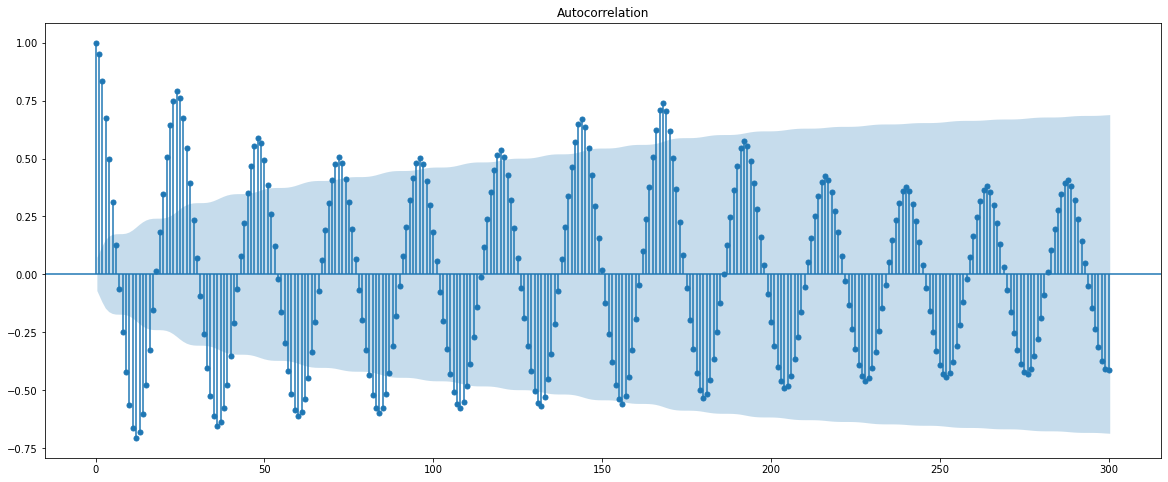

In [207]:
plot_acf(jul_data_agg['percent_lots_available'], lags=300)
plt.show()

**The autocorrelation oscillates periodically as the number of lags increase.**

**Hence, we introduce lag_1 and lag_168 as a new feature in our dataframe.**

lag_168 is used for the following reason:

We have seen in question one that hourly car park availability data trend varies depending on the day of the week. We also notice a peak (relatively higher that other peaks in the neighbourhood) at 168 in the above autocorrelation graph. Hence, we can say that for each week of the month, previous week's daily car park availability data is in some sense linked to the respective daily data of the current week. We provide this data as a feature by using a lag of 7*24 = 168 hours.

In [208]:
jul_data_agg['lag_1'] = jul_data_agg['percent_lots_available'].shift(1)
jul_data_agg['lag_168'] = jul_data_agg['percent_lots_available'].shift(168)
jul_data_agg.iloc[0:1]['lag_1'] = jul_data_agg.iloc[:-1]['percent_lots_available']
jul_data_agg.iloc[0:168]['lag_168'] = jul_data_agg.iloc[:-168]['percent_lots_available']
jul_data_agg

,day,hour,percent_lots_available,lag_1,lag_168
0,1,0,41.137362,41.137362,41.137362
1,1,1,40.466705,41.137362,40.466705
2,1,2,40.230397,40.466705,40.230397
3,1,3,40.092102,40.230397,40.092102
4,1,4,40.140132,40.092102,40.140132
...,...,...,...,...,...
739,31,19,44.996335,45.850715,45.128865
740,31,20,44.209855,44.996335,44.577674
741,31,21,43.197756,44.209855,43.560281
742,31,22,42.246247,43.197756,42.516975


**We choose the following features for training our models:** 

    1. day
    2. hour
    3. lag_1
    4. lag_168

In [209]:
X_train = jul_data_agg[['day', 'hour', 'lag_1', 'lag_168']]
print(X_train)
y_train = jul_data_agg[['percent_lots_available']]
y_train

     day  hour      lag_1    lag_168
0      1     0  41.137362  41.137362
1      1     1  41.137362  40.466705
2      1     2  40.466705  40.230397
3      1     3  40.230397  40.092102
4      1     4  40.092102  40.140132
..   ...   ...        ...        ...
739   31    19  45.850715  45.128865
740   31    20  44.996335  44.577674
741   31    21  44.209855  43.560281
742   31    22  43.197756  42.516975
743   31    23  42.246247  41.585573

[744 rows x 4 columns]


,percent_lots_available
0,41.137362
1,40.466705
2,40.230397
3,40.092102
4,40.140132
...,...
739,44.996335
740,44.209855
741,43.197756
742,42.246247


In [210]:
aug_data_agg['lag_1'] = aug_data_agg['percent_lots_available'].shift(1)
aug_data_agg['lag_168'] = aug_data_agg['percent_lots_available'].shift(168)
aug_data_agg.iloc[0:1]['lag_1'] = aug_data_agg.iloc[:-1]['percent_lots_available']
aug_data_agg.iloc[0:168]['lag_168'] = aug_data_agg.iloc[:-168]['percent_lots_available']
aug_data_agg

,day,hour,percent_lots_available,lag_1,lag_168
0,1,0,40.938919,40.938919,40.938919
1,1,1,40.554581,40.938919,40.554581
2,1,2,40.055804,40.554581,40.055804
3,1,3,39.835725,40.055804,39.835725
4,1,4,39.713934,39.835725,39.713934
...,...,...,...,...,...
739,31,19,49.072470,53.751777,49.676468
740,31,20,45.795070,49.072470,45.779352
741,31,21,44.254442,45.795070,44.692360
742,31,22,43.061185,44.254442,42.872245


In [211]:
X_test = aug_data_agg[['hour', 'day', 'lag_1', 'lag_168']]
print(X_test)
y_test = aug_data_agg[['percent_lots_available']]
y_test

     hour  day      lag_1    lag_168
0       0    1  40.938919  40.938919
1       1    1  40.938919  40.554581
2       2    1  40.554581  40.055804
3       3    1  40.055804  39.835725
4       4    1  39.835725  39.713934
..    ...  ...        ...        ...
739    19   31  53.751777  49.676468
740    20   31  49.072470  45.779352
741    21   31  45.795070  44.692360
742    22   31  44.254442  42.872245
743    23   31  43.061185  41.459960

[744 rows x 4 columns]


,percent_lots_available
0,40.938919
1,40.554581
2,40.055804
3,39.835725
4,39.713934
...,...
739,49.072470
740,45.795070
741,44.254442
742,43.061185


**We now reshape our data as an array to make it usable for training and testing.**

In [212]:
X_train_arr = np.asarray(X_train).reshape(-1, 4)
X_train_arr

array([[ 1.        ,  0.        , 41.13736169, 41.13736169],
       [ 1.        ,  1.        , 41.13736169, 40.46670481],
       [ 1.        ,  2.        , 40.46670481, 40.23039698],
       ...,
       [31.        , 21.        , 44.20985463, 43.56028113],
       [31.        , 22.        , 43.19775635, 42.51697534],
       [31.        , 23.        , 42.24624687, 41.58557344]])

**The data is then scaled (normalised) using StandardScaler() from the scikit learn library.**

In [213]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_arr)
X_train_scaled

array([[-1.67705098, -1.66132477, -0.96952829, -0.95996801],
       [-1.67705098, -1.51686175, -0.96952829, -1.05686281],
       [-1.67705098, -1.37239873, -1.06491738, -1.09100397],
       ...,
       [ 1.67705098,  1.37239873, -0.53252044, -0.60991076],
       [ 1.67705098,  1.51686175, -0.67647354, -0.76064493],
       [ 1.67705098,  1.66132477, -0.81180896, -0.89521152]])

**We reshape our target values to fit them into the models and scale them for easier comparability.**

In [214]:
y_train_arr = np.asarray(y_train).reshape(-1, 1)
y_train_arr

array([[41.13736169],
       [40.46670481],
       [40.23039698],
       [40.09210219],
       [40.14013229],
       [40.77368108],
       [46.27850503],
       [51.5129416 ],
       [56.20266091],
       [57.96407253],
       [58.57137855],
       [58.57959527],
       [57.80754757],
       [59.14236275],
       [59.13373168],
       [58.72826347],
       [57.65066762],
       [55.67607521],
       [51.41017   ],
       [48.30255313],
       [46.54025432],
       [47.25711767],
       [45.19325504],
       [43.64012328],
       [42.59407737],
       [41.63526628],
       [40.92163787],
       [41.0760943 ],
       [40.07673297],
       [40.36413002],
       [41.60247654],
       [44.06182283],
       [46.39961704],
       [48.10674092],
       [48.85906744],
       [50.38259832],
       [50.22853935],
       [49.96346703],
       [49.82814136],
       [49.84479704],
       [49.80972861],
       [49.75940703],
       [49.21869574],
       [47.91118061],
       [47.84873257],
       [46

In [215]:
scaler_1 = StandardScaler()
y_train_scaled = scaler_1.fit_transform(y_train_arr)
y_train_scaled

array([[-9.69629982e-01],
       [-1.06502387e+00],
       [-1.09863618e+00],
       [-1.11830716e+00],
       [-1.11147538e+00],
       [-1.02135973e+00],
       [-2.38356383e-01],
       [ 5.06187198e-01],
       [ 1.17325047e+00],
       [ 1.42379276e+00],
       [ 1.51017566e+00],
       [ 1.51134440e+00],
       [ 1.40152873e+00],
       [ 1.59139216e+00],
       [ 1.59016448e+00],
       [ 1.53249089e+00],
       [ 1.37921421e+00],
       [ 1.09834919e+00],
       [ 4.91569018e-01],
       [ 4.95431833e-02],
       [-2.01125298e-01],
       [-9.91590215e-02],
       [-3.92721788e-01],
       [-6.13638455e-01],
       [-7.62427489e-01],
       [-8.98808289e-01],
       [-1.00031443e+00],
       [-9.78344625e-01],
       [-1.12049327e+00],
       [-1.07961406e+00],
       [-9.03472284e-01],
       [-5.53656126e-01],
       [-2.21129473e-01],
       [ 2.16909551e-02],
       [ 1.28701494e-01],
       [ 3.45407747e-01],
       [ 3.23494478e-01],
       [ 2.85790727e-01],
       [ 2.6

**An hours array containing 744 hours representing every hour of every day of the month is created below.**
**This array was created to help visualise the carpark_availability trends across the entire month**

In [216]:
hours = []
for day in range(1, 32):
    for hour in range(0, 24):
        hours.append(24*(day-1) + hour)
hours 

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


**We now create a dictionary for storing the model performance metrics for each of the three regression models.**

In [217]:
model_metrics= {'linreg': {},'svr': {},'dtr': {}} 


## Question 2.2

**Build a linear regression model to forecast the hourly carpark availability for the month of August.**

Training data: July 2022
Test data: August 2022

The target is the hourly carpark availability percentage and you will have to decide what features you want to use.

### LR Model

The below model is being run with the best parameters generated from hyperparameter tuning done [here](#Hyperparameter-Tuning-for-Linear-Regression-Model-(Q2.5)).

In [218]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(copy_X = True, fit_intercept = False, normalize = True, positive = False)
regressor.fit(X_train_scaled, y_train_scaled)

LinearRegression(fit_intercept=False, normalize=True)

The graph below shows how the model fits to the training data.

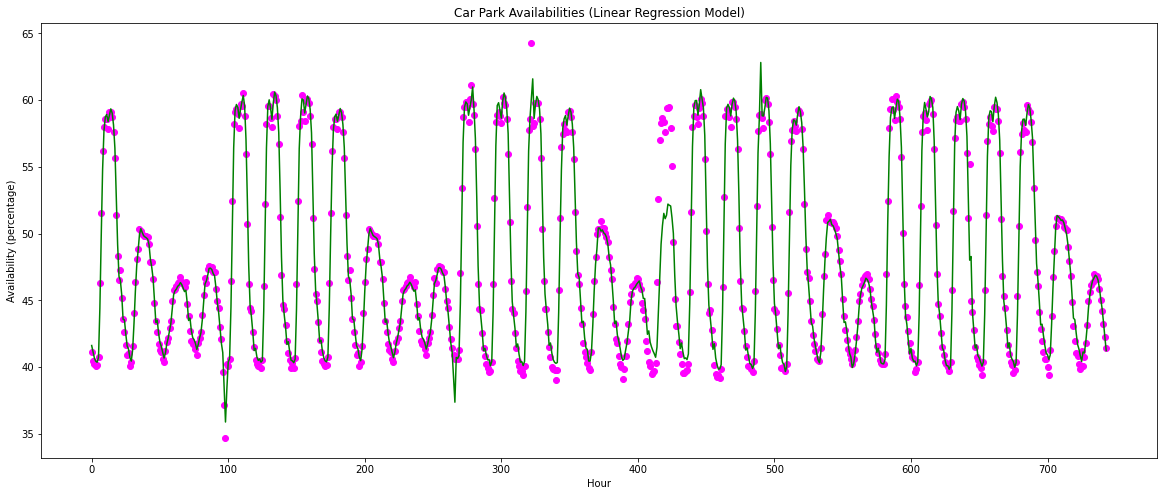

In [219]:
predicted_noscale = scaler_1.inverse_transform(regressor.predict(X_train_scaled).reshape(-1, 1))
plt.scatter(np.asarray(hours), y_train_arr[:, 0], color = 'magenta')
plt.plot(np.asarray(hours), predicted_noscale, color = 'green')
plt.title('Car Park Availabilities (Linear Regression Model)')
plt.xlabel('Hour')
plt.ylabel('Availability (percentage)')
plt.show()

**The test data is reshaped and rescaled to make it usable for testing the model.**

In [221]:
X_test_arr = np.asarray(X_test).reshape(-1, 4)
X_test_arr

array([[ 0.        ,  1.        , 40.93891861, 40.93891861],
       [ 1.        ,  1.        , 40.93891861, 40.5545808 ],
       [ 2.        ,  1.        , 40.5545808 , 40.0558044 ],
       ...,
       [21.        , 31.        , 45.7950703 , 44.69236034],
       [22.        , 31.        , 44.25444152, 42.87224529],
       [23.        , 31.        , 43.0611855 , 41.45996038]])

In [222]:
y_test_arr = np.asarray(y_test).reshape(-1, 1)
y_test_arr

array([[40.93891861],
       [40.5545808 ],
       [40.0558044 ],
       [39.83572506],
       [39.71393391],
       [39.86636582],
       [42.05535773],
       [50.10374533],
       [55.88221086],
       [58.80737688],
       [59.17789385],
       [59.04063701],
       [57.56331639],
       [58.75385083],
       [59.96029299],
       [59.87276765],
       [58.7946629 ],
       [57.41703982],
       [53.12145361],
       [47.33884902],
       [44.62437286],
       [43.797714  ],
       [42.60111376],
       [41.2188349 ],
       [42.75559557],
       [42.13255972],
       [41.76355065],
       [40.89800615],
       [40.43201805],
       [40.25157431],
       [40.72329208],
       [41.19500985],
       [41.66672762],
       [42.13844539],
       [43.71957357],
       [45.19161313],
       [45.93998382],
       [46.68835451],
       [46.86215225],
       [47.10317073],
       [47.12364356],
       [46.82048393],
       [46.5173243 ],
       [46.00313006],
       [45.77985621],
       [45

In [223]:
X_test_scaled = scaler.transform(X_test_arr)
y_test_scaled = scaler_1.transform(y_test_arr)

We predict and rescale the values back to their normal percentages ranging from 0 - 100%.

In [224]:
predicted_scaled = regressor.predict(X_test_scaled)
predicted = scaler_1.inverse_transform(predicted_scaled.reshape(-1, 1))

Now, we can evaluate the model based on the following metrics.

In [225]:
from sklearn import metrics
score = regressor.score(X_test_scaled,y_test_scaled)
train_MSE = metrics.mean_squared_error(y_train_scaled, regressor.predict(X_train_scaled))
test_MSE = metrics.mean_squared_error(y_test_scaled, predicted_scaled)
print("R-squared:", score)
print('Mean Squared Error (Train):', train_MSE)
print('Mean Squared Error (Test):', test_MSE)

R-squared: 0.9572695484564134
Mean Squared Error (Train): 0.034083834699874006
Mean Squared Error (Test): 0.047587137642422096


**The metrics are stored in a dictionary for easier future access and comparison.**

In [226]:
model_metrics['linreg']['r2'] = score
model_metrics['linreg']['train_mse'] = train_MSE
model_metrics['linreg']['test_mse'] = test_MSE

model_metrics

{'linreg': {'r2': 0.9572695484564134,
  'train_mse': 0.034083834699874006,
  'test_mse': 0.047587137642422096},
 'svr': {},
 'dtr': {}}

### Time series plot of the actual and predicted hourly values

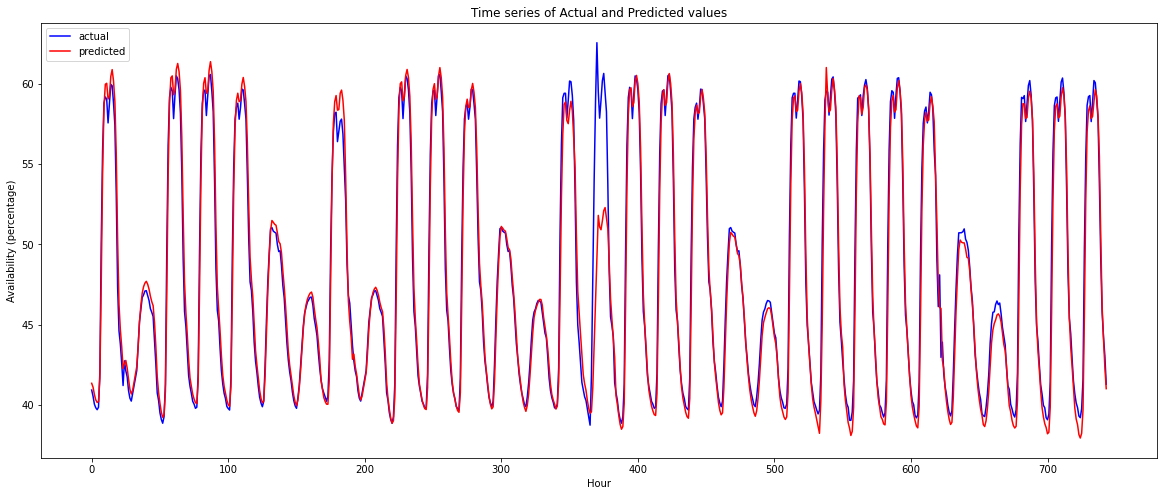

In [227]:
# Plotting the time series
plt.plot(hours, y_test_arr, "-b", label = "actual")
plt.plot(hours, predicted, "-r", label = "predicted")

plt.title('Time series of Actual and Predicted values')
plt.legend(loc="upper left")

plt.xlabel('Hour')
plt.ylabel('Availability (percentage)')

plt.show()

**Below, we also plot the time series for hourly data aggregated over different days of the month.**

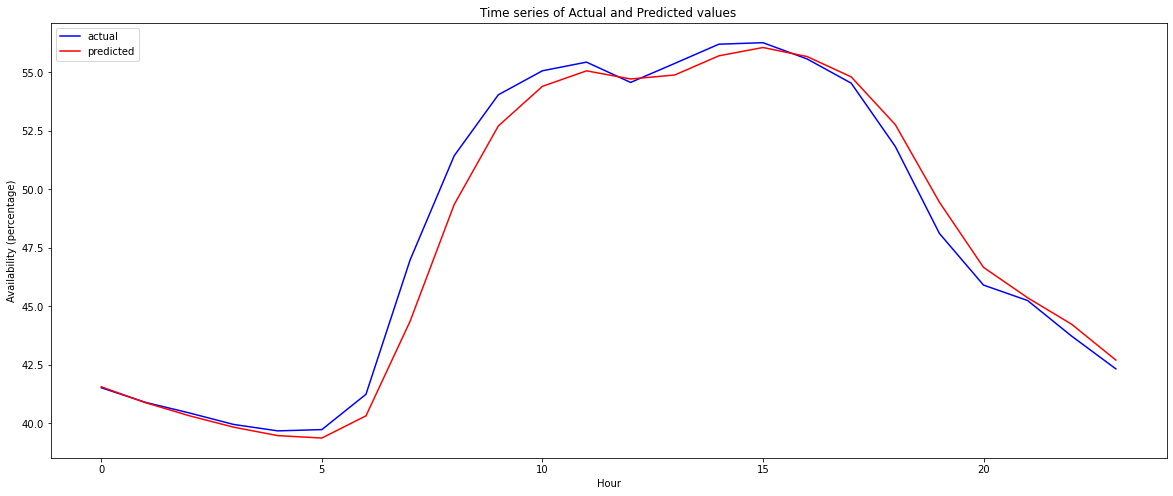

In [228]:
# Plotting the time series
predicted_df = pd.DataFrame(columns = ['hour', 'predicted_val'])
predicted_df['hour'] = X_test_arr[:, 0]
predicted_df['predicted_val'] = predicted

predicted_agg = predicted_df.groupby(['hour'], as_index = False)['predicted_val'].mean()

actual_df = pd.DataFrame(columns = ['hour', 'actual_val'])
actual_df['hour'] = X_test_arr[:, 0]
actual_df['actual_val'] = y_test_arr[:, 0]

actual_agg = actual_df.groupby(['hour'], as_index = False)['actual_val'].mean()

plt.plot(actual_agg['hour'], actual_agg['actual_val'], "-b", label = "actual")
plt.plot(predicted_agg['hour'], predicted_agg['predicted_val'], "-r", label = "predicted")

plt.title('Time series of Actual and Predicted values')

plt.legend(loc="upper left")

plt.xlabel('Hour')
plt.ylabel('Availability (percentage)')

plt.show()

### Scatter plot of Actual vs Predicted hourly values

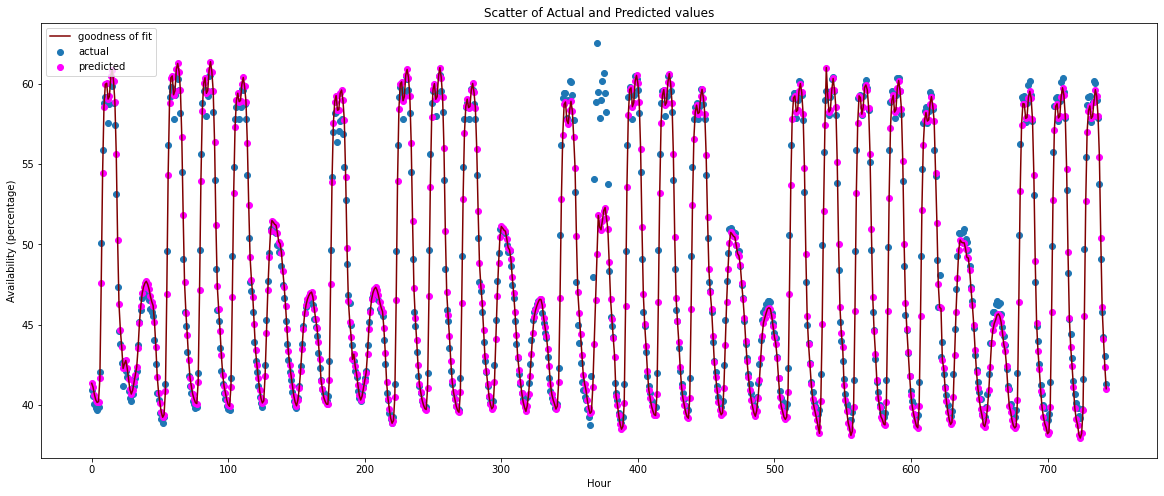

In [229]:
# Plotting
plt.scatter(hours, y_test_arr[:, 0], label = "actual")
plt.scatter(hours, predicted, color='magenta', label='predicted')

plt.plot(hours, predicted, color = "maroon", label = "goodness of fit")

plt.title('Scatter of Actual and Predicted values')
plt.legend(loc="upper left")

plt.xlabel('Hour')
plt.ylabel('Availability (percentage)')

plt.show()

**Below, we also plot the scatter for hourly data aggregated over different days of the month.**

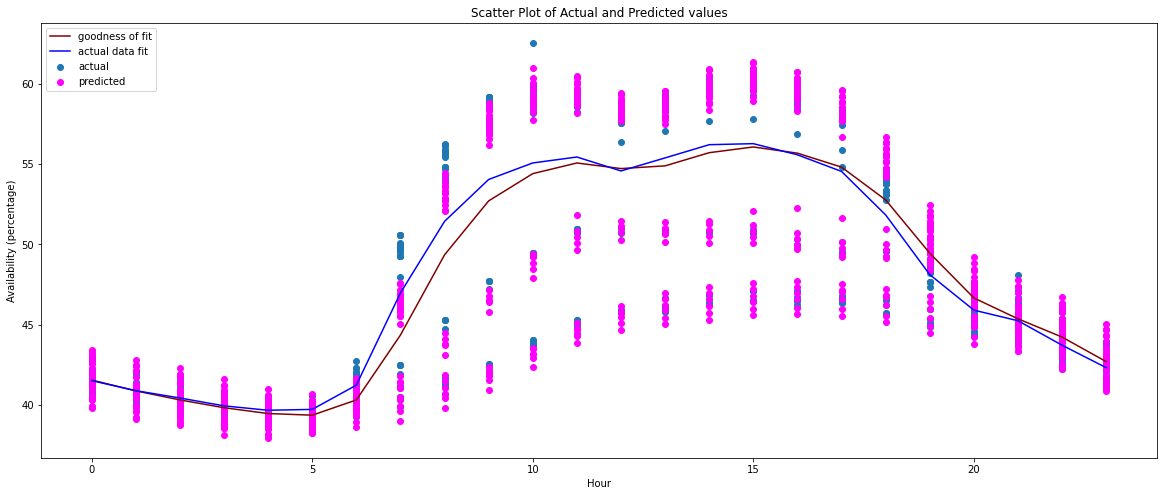

In [230]:
# Plotting the Scatter Plot
plt.scatter(X_test_arr[:, 0], y_test_arr[:, 0], label = "actual")
plt.scatter(X_test_arr[:, 0], predicted, color='magenta', label='predicted')

predicted_df = pd.DataFrame(columns = ['hour', 'predicted_val'])
predicted_df['hour'] = X_test_arr[:, 0]
predicted_df['predicted_val'] = predicted

predicted_agg = predicted_df.groupby(['hour'], as_index = False)['predicted_val'].mean()

actual_df = pd.DataFrame(columns = ['hour', 'actual_val'])
actual_df['hour'] = X_test_arr[:, 0]
actual_df['actual_val'] = y_test_arr[:, 0]

actual_agg = actual_df.groupby(['hour'], as_index = False)['actual_val'].mean()

plt.plot(predicted_agg['hour'], predicted_agg['predicted_val'], color = "maroon", label = "goodness of fit")
plt.plot(actual_agg['hour'], actual_agg['actual_val'], color = "blue", label = "actual data fit")

plt.title('Scatter Plot of Actual and Predicted values')

plt.legend(loc="upper left")

plt.xlabel('Hour')
plt.ylabel('Availability (percentage)')

plt.show()

### Hyperparameter Tuning for Linear Regression Model (Q2.5)

In [231]:
regressor.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [232]:
param_grid_linreg = {'copy_X':[True, False],'fit_intercept':[True,False],'normalize':[True,False], 'positive':[True,False]}
grid_linreg = GridSearchCV(LinearRegression(), param_grid_linreg, n_jobs = -1)
#fitting the Linear Regression model for Grid Search
result = grid_linreg.fit(X_train_scaled, y_train_scaled)

Retrieve best parameter after tuning linear regression model. Also print how model looks after hyper-parameter tuning. The parameters are used in the model as seen [here](#LR-Model).

In [233]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.9505776002369245
Best Hyperparameters: {'copy_X': True, 'fit_intercept': False, 'normalize': True, 'positive': False}


## Question 2.3

**Build a support vector regressor (SVR) model to forecast the hourly carpark availability for the month of August.**

Training data: July 2022
Test data: August 2022

The target is the hourly carpark availability percentage and you will have to decide what features you want to use.

### SVR Model

The below model is being run with the best params generated from hyperparameter tuning done in [this](#Hyperparameter-Tuning-for-Support-Vector-Regression-Model-(Q2.5)) section.

In [234]:
regressor = SVR(C=1, gamma = 0.01)
regressor.fit(X_train_scaled, y_train_scaled)

SVR(C=1, gamma=0.01)

The graph below shows how the model fits to the training data

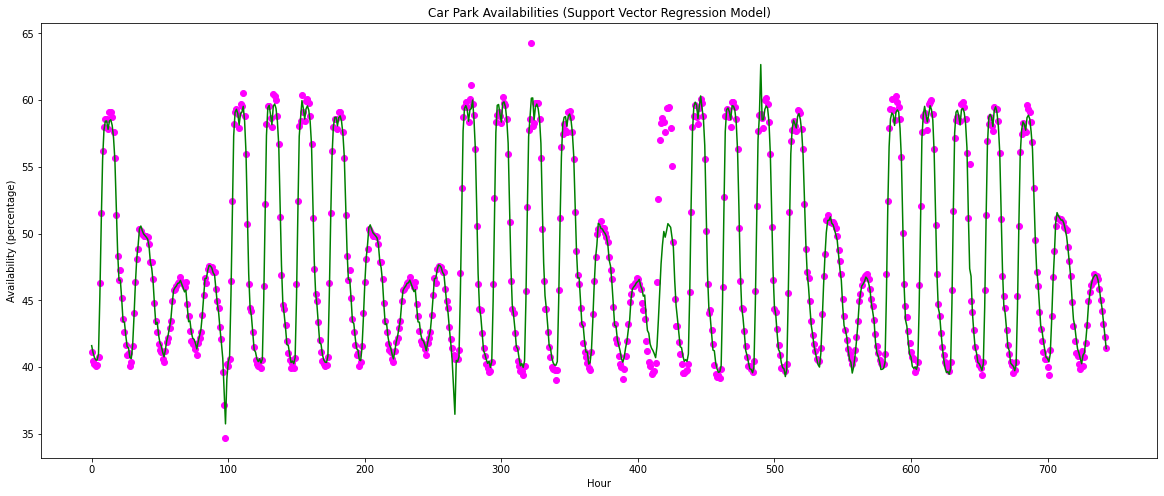

In [235]:
predicted_noscale = scaler_1.inverse_transform(regressor.predict(X_train_scaled).reshape(-1, 1))
plt.scatter(np.asarray(hours), y_train_arr[:, 0], color = 'magenta')
plt.plot(np.asarray(hours), predicted_noscale, color = 'green')
plt.title('Car Park Availabilities (Support Vector Regression Model)')
plt.xlabel('Hour')
plt.ylabel('Availability (percentage)')
plt.show()

**The test data is reshaped and rescaled to make it usable for testing the model.**

In [236]:
X_test_arr = np.asarray(X_test).reshape(-1, 4)
X_test_arr

array([[ 0.        ,  1.        , 40.93891861, 40.93891861],
       [ 1.        ,  1.        , 40.93891861, 40.5545808 ],
       [ 2.        ,  1.        , 40.5545808 , 40.0558044 ],
       ...,
       [21.        , 31.        , 45.7950703 , 44.69236034],
       [22.        , 31.        , 44.25444152, 42.87224529],
       [23.        , 31.        , 43.0611855 , 41.45996038]])

In [237]:
y_test_arr = np.asarray(y_test).reshape(-1, 1)
y_test_arr

array([[40.93891861],
       [40.5545808 ],
       [40.0558044 ],
       [39.83572506],
       [39.71393391],
       [39.86636582],
       [42.05535773],
       [50.10374533],
       [55.88221086],
       [58.80737688],
       [59.17789385],
       [59.04063701],
       [57.56331639],
       [58.75385083],
       [59.96029299],
       [59.87276765],
       [58.7946629 ],
       [57.41703982],
       [53.12145361],
       [47.33884902],
       [44.62437286],
       [43.797714  ],
       [42.60111376],
       [41.2188349 ],
       [42.75559557],
       [42.13255972],
       [41.76355065],
       [40.89800615],
       [40.43201805],
       [40.25157431],
       [40.72329208],
       [41.19500985],
       [41.66672762],
       [42.13844539],
       [43.71957357],
       [45.19161313],
       [45.93998382],
       [46.68835451],
       [46.86215225],
       [47.10317073],
       [47.12364356],
       [46.82048393],
       [46.5173243 ],
       [46.00313006],
       [45.77985621],
       [45

In [239]:
X_test_scaled = scaler.transform(X_test_arr)
y_test_scaled = scaler_1.transform(y_test_arr)

We predict and rescale the values back to their normal percentages ranging from 0 - 100%.

In [240]:
predicted_scaled = regressor.predict(X_test_scaled)
predicted = scaler_1.inverse_transform(predicted_scaled.reshape(-1, 1))

Now, we can evaluate the model based on the following metrics.

In [241]:
score = regressor.score(X_test_scaled,y_test_scaled)
train_MSE = metrics.mean_squared_error(y_train_scaled, regressor.predict(X_train_scaled))
test_MSE = metrics.mean_squared_error(y_test_scaled, predicted_scaled)
print("R-squared:", score)
print('Mean Squared Error (Train):', train_MSE)
print('Mean Squared Error (Test):', test_MSE)

R-squared: 0.943766506053293
Mean Squared Error (Train): 0.03371230262263064
Mean Squared Error (Test): 0.06262491782532768


**The metrics are stored in a dictionary for easier future access and comparison.**

In [242]:
model_metrics['svr']['r2'] = score
model_metrics['svr']['train_mse'] = train_MSE
model_metrics['svr']['test_mse'] = test_MSE

model_metrics

{'linreg': {'r2': 0.9572695484564134,
  'train_mse': 0.034083834699874006,
  'test_mse': 0.047587137642422096},
 'svr': {'r2': 0.943766506053293,
  'train_mse': 0.03371230262263064,
  'test_mse': 0.06262491782532768},
 'dtr': {}}

### Time series plot of the actual and predicted hourly values

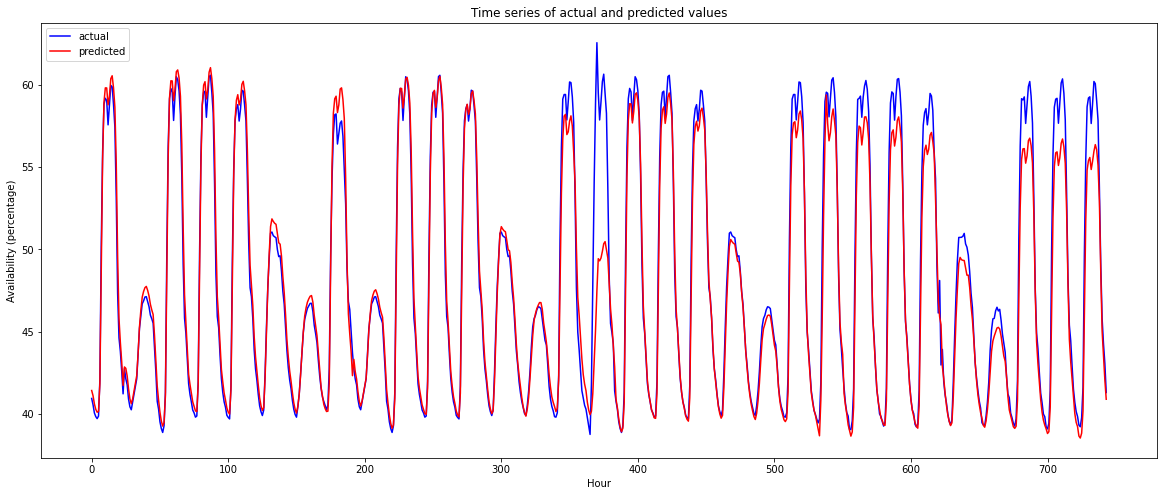

In [55]:
# Plotting the time series
plt.plot(hours, y_test_arr, "-b", label = "actual")
plt.plot(hours, predicted, "-r", label = "predicted")

plt.title('Time series of actual and predicted values')
 
# rotating the x-axis tick labels at 30degree
# towards right
# plt.xticks(rotation=30, ha='right')

plt.legend(loc="upper left")

plt.xlabel('Hour')
plt.ylabel('Availability (percentage)')

plt.show()

**Below, we also plot the time series for hourly data aggregated over different days of the month.**

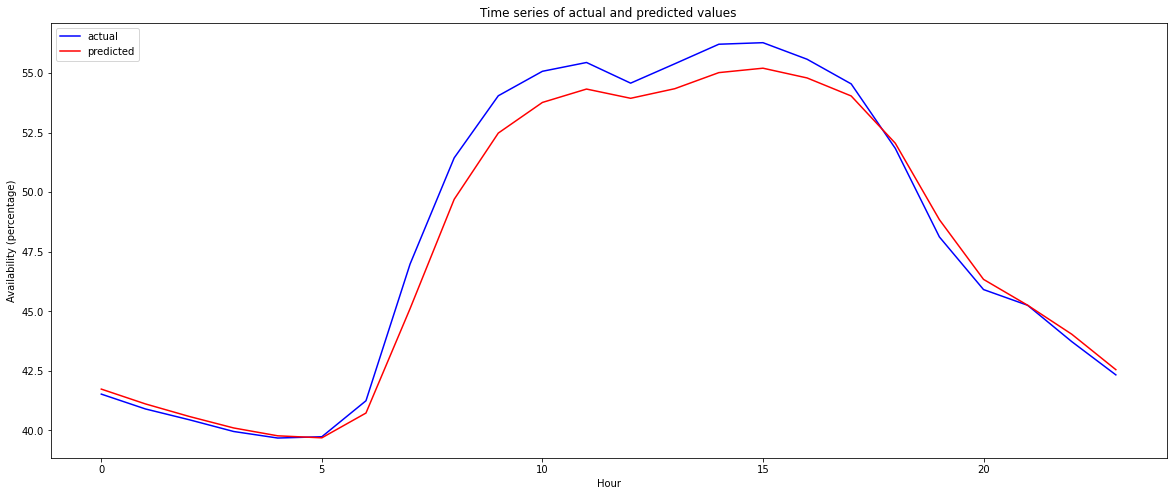

In [56]:
# Plotting the time series

predicted_df = pd.DataFrame(columns = ['hour', 'predicted_val'])
predicted_df['hour'] = X_test_arr[:, 0]
predicted_df['predicted_val'] = predicted

predicted_agg = predicted_df.groupby(['hour'], as_index = False)['predicted_val'].mean()

actual_df = pd.DataFrame(columns = ['hour', 'actual_val'])
actual_df['hour'] = X_test_arr[:, 0]
actual_df['actual_val'] = y_test_arr[:, 0]

actual_agg = actual_df.groupby(['hour'], as_index = False)['actual_val'].mean()

plt.plot(actual_agg['hour'], actual_agg['actual_val'], "-b", label = "actual")
plt.plot(predicted_agg['hour'], predicted_agg['predicted_val'], "-r", label = "predicted")

plt.title('Time series of actual and predicted values')
 
# rotating the x-axis tick labels at 30degree
# towards right
# plt.xticks(rotation=30, ha='right')

plt.legend(loc="upper left")

plt.xlabel('Hour')
plt.ylabel('Availability (percentage)')

plt.show()

### Scatter plot of actual vs predicted hourly values

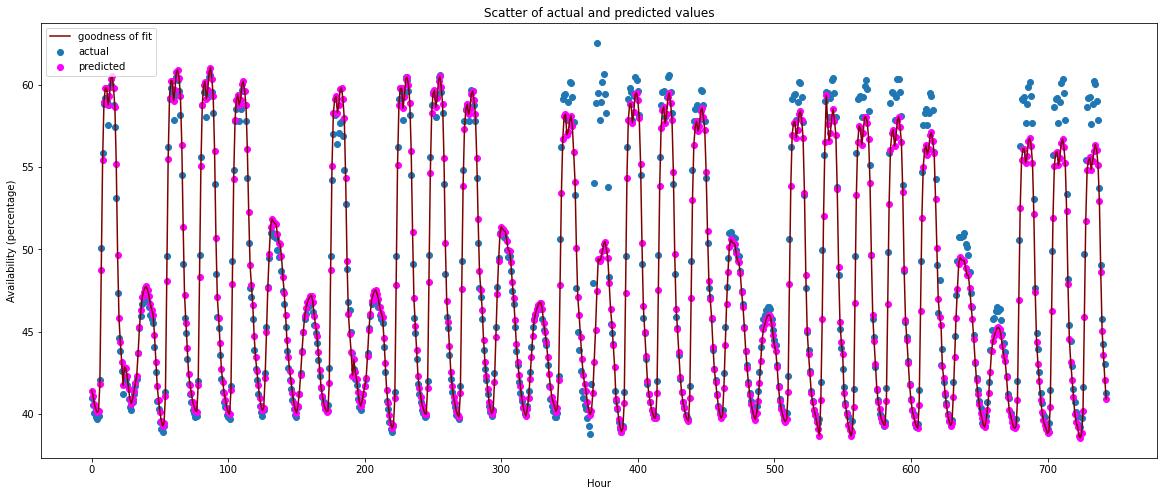

In [57]:
# Plotting
plt.scatter(hours, y_test_arr[:, 0], label = "actual")
plt.scatter(hours, predicted, color='magenta', label='predicted')

plt.plot(hours, predicted, color = "maroon", label = "goodness of fit")
# plt.plot(hours, y_test_arr[:, 0], color = "blue", label = "actual data fit")

plt.title('Scatter of actual and predicted values')
 
# rotating the x-axis tick labels at 30degree
# towards right
# plt.xticks(rotation=30, ha='right')

plt.legend(loc="upper left")

plt.xlabel('Hour')
plt.ylabel('Availability (percentage)')

plt.show()

**Below, we also plot the scatter for hourly data aggregated over different days of the month.**

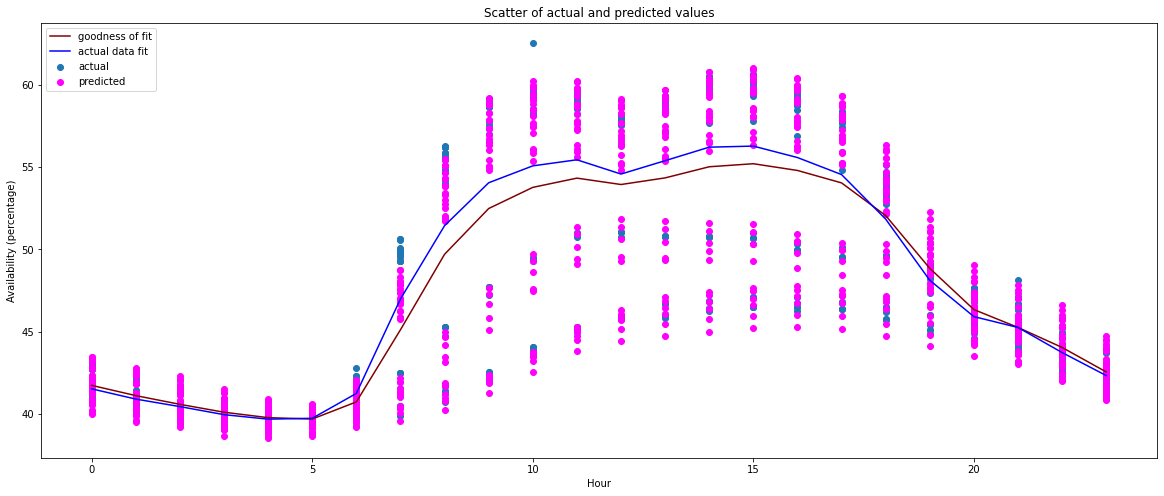

In [58]:
# Plotting
plt.scatter(X_test_arr[:, 0], y_test_arr[:, 0], label = "actual")
plt.scatter(X_test_arr[:, 0], predicted, color='magenta', label='predicted')

predicted_df = pd.DataFrame(columns = ['hour', 'predicted_val'])
predicted_df['hour'] = X_test_arr[:, 0]
predicted_df['predicted_val'] = predicted

predicted_agg = predicted_df.groupby(['hour'], as_index = False)['predicted_val'].mean()

actual_df = pd.DataFrame(columns = ['hour', 'actual_val'])
actual_df['hour'] = X_test_arr[:, 0]
actual_df['actual_val'] = y_test_arr[:, 0]

actual_agg = actual_df.groupby(['hour'], as_index = False)['actual_val'].mean()

plt.plot(predicted_agg['hour'], predicted_agg['predicted_val'], color = "maroon", label = "goodness of fit")
plt.plot(actual_agg['hour'], actual_agg['actual_val'], color = "blue", label = "actual data fit")

plt.title('Scatter of actual and predicted values')
 
# rotating the x-axis tick labels at 30degree
# towards right
# plt.xticks(rotation=30, ha='right')

plt.legend(loc="upper left")

plt.xlabel('Hour')
plt.ylabel('Availability (percentage)')

plt.show()

### Hyperparameter Tuning for Support Vector Regression Model (Q2.5)

In [59]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [10, 1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'sigmoid']} 
  
grid_svr = GridSearchCV(SVR(), param_grid, refit = True, verbose = 1)

# fitting the model for grid search
grid_svr.fit(X_train_scaled, y_train_scaled)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=1)

Retrieve best parameter after tuning support vector regression model. Also print how model looks after hyper-parameter tuning. The parameters are used in the model as seen [here](#SVR-Model).

In [60]:
# print best parameter after tuning
print(grid_svr.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_svr.best_estimator_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVR(C=1, gamma=0.01)


## Question 2.4

**Build a Decision tree (DT) model to forecast the hourly carpark availability for the month of August.**

Training data: July 2022
Test data: August 2022

The target is the hourly carpark availability percentage and you will have to decide what features you want to use.

### DTR Model

The model is tuned for hyperparameters by trial and error.

In [99]:
from sklearn.tree import DecisionTreeRegressor

In [185]:
regr_dt = DecisionTreeRegressor(max_depth=3, max_features='log2', random_state = 0)
regr_dt.fit(X_train_scaled, y_train_scaled)

DecisionTreeRegressor(max_depth=3, max_features='log2', random_state=0)

The graph below shows how the model fits to the training data

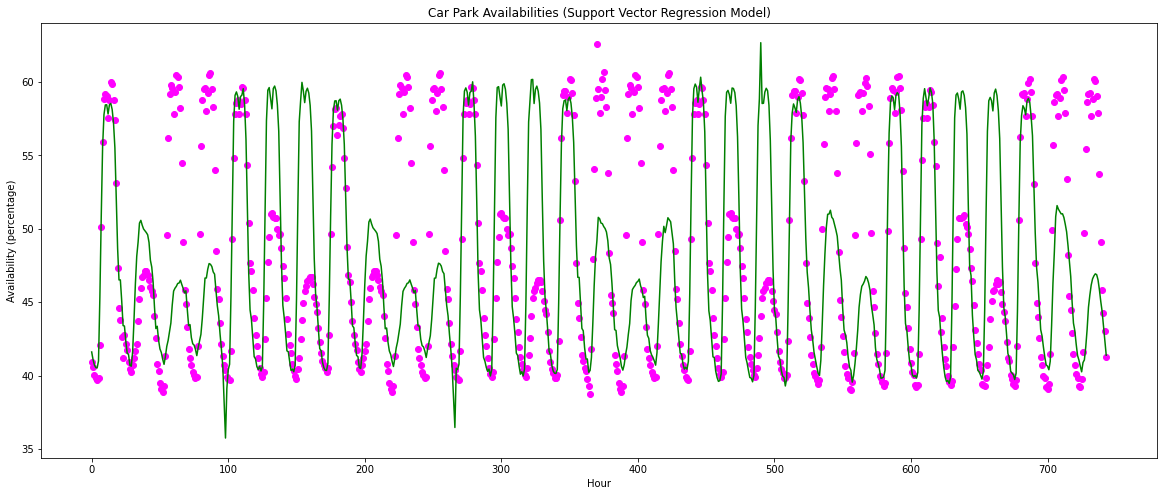

In [186]:
predicted_noscale = scaler_1.inverse_transform(regressor.predict(X_train_scaled).reshape(-1, 1))
plt.scatter(np.asarray(hours), y_test_arr[:, 0], color = 'magenta')
plt.plot(np.asarray(hours), predicted_noscale, color = 'green')
plt.title('Car Park Availabilities (Support Vector Regression Model)')
plt.xlabel('Hour')
plt.ylabel('Availability (percentage)')
plt.show()

The reshaped and rescaled test values from the previous section on SVR model are used.

We predict and rescale the values back to their normal percentages ranging from 0 - 100%.

In [246]:
predicted_scaled = regr_dt.predict(X_test_scaled)
predicted = scaler_1.inverse_transform(predicted_scaled.reshape(-1, 1))

Now, we can evaluate the model based on the following metrics.

In [247]:
score = regr_dt.score(X_test_scaled,y_test_scaled)
train_MSE = metrics.mean_squared_error(y_train_scaled, regr_dt.predict(X_train_scaled))
test_MSE = metrics.mean_squared_error(y_test_scaled, predicted_scaled)
print("R-squared:", score)
print('Mean Squared Error (Train):', train_MSE)
print('Mean Squared Error (Test):', test_MSE)

R-squared: 0.9429323829414074
Mean Squared Error (Train): 0.04172032465273418
Mean Squared Error (Test): 0.06355384625697649


**The metrics are stored in a dictionary for easier future access and comparison.**

In [248]:
model_metrics['dtr']['r2'] = score
model_metrics['dtr']['train_mse'] = train_MSE
model_metrics['dtr']['test_mse'] = test_MSE

model_metrics

{'linreg': {'r2': 0.9572695484564134,
  'train_mse': 0.034083834699874006,
  'test_mse': 0.047587137642422096},
 'svr': {'r2': 0.943766506053293,
  'train_mse': 0.03371230262263064,
  'test_mse': 0.06262491782532768},
 'dtr': {'r2': 0.9429323829414074,
  'train_mse': 0.04172032465273418,
  'test_mse': 0.06355384625697649}}

### Time series plot of the actual and predicted hourly values

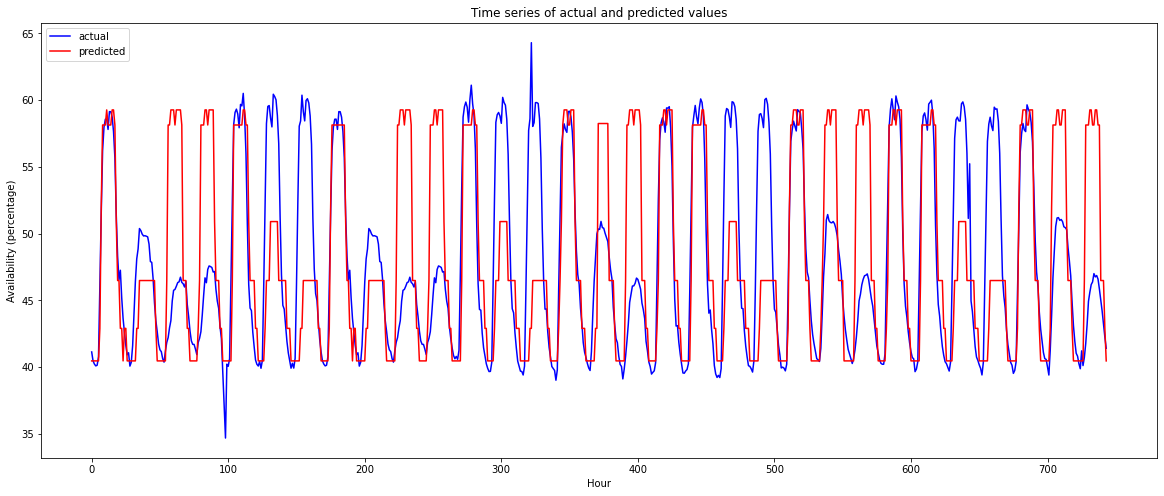

In [249]:
# Plotting the time series
plt.plot(hours, y_train_arr, "-b", label = "actual")
plt.plot(hours, predicted, "-r", label = "predicted")

plt.title('Time series of actual and predicted values')
 
# rotating the x-axis tick labels at 30degree
# towards right
# plt.xticks(rotation=30, ha='right')

plt.legend(loc="upper left")

plt.xlabel('Hour')
plt.ylabel('Availability (percentage)')

plt.show()

**Below, we also plot the time series for hourly data aggregated over different days of the month.**

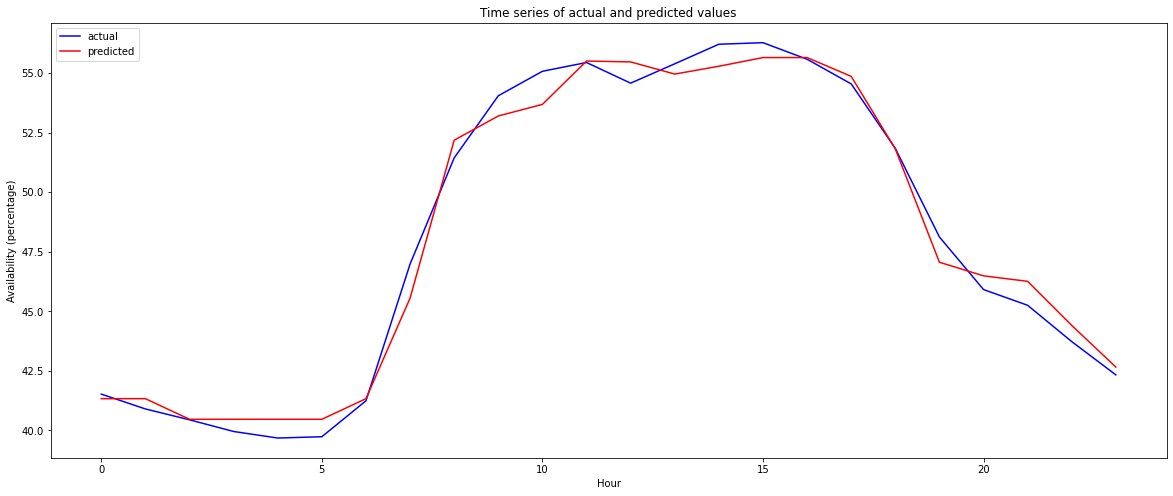

In [250]:
# Plotting the time series

predicted_df = pd.DataFrame(columns = ['hour', 'predicted_val'])
predicted_df['hour'] = X_test_arr[:, 0]
predicted_df['predicted_val'] = predicted

predicted_agg = predicted_df.groupby(['hour'], as_index = False)['predicted_val'].mean()

actual_df = pd.DataFrame(columns = ['hour', 'actual_val'])
actual_df['hour'] = X_test_arr[:, 0]
actual_df['actual_val'] = y_test_arr[:, 0]

actual_agg = actual_df.groupby(['hour'], as_index = False)['actual_val'].mean()

plt.plot(actual_agg['hour'], actual_agg['actual_val'], "-b", label = "actual")
plt.plot(predicted_agg['hour'], predicted_agg['predicted_val'], "-r", label = "predicted")

plt.title('Time series of actual and predicted values')
 
# rotating the x-axis tick labels at 30degree
# towards right
# plt.xticks(rotation=30, ha='right')

plt.legend(loc="upper left")

plt.xlabel('Hour')
plt.ylabel('Availability (percentage)')

plt.show()

### Scatter plot of actual vs predicted hourly values

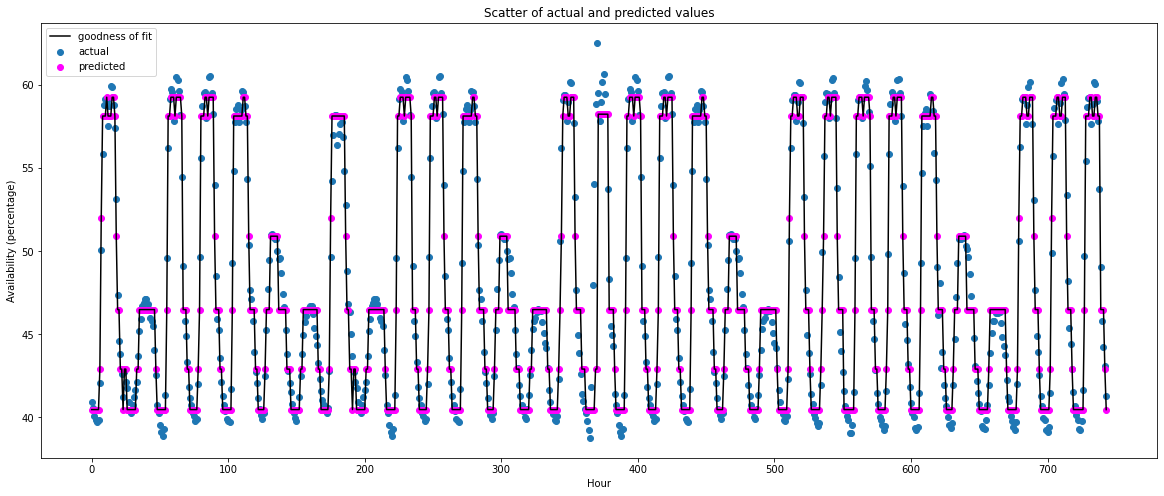

In [251]:
# Plotting
plt.scatter(hours, y_test_arr[:, 0], label = "actual")
plt.scatter(hours, predicted, color='magenta', label='predicted')

plt.plot(hours, predicted, color = "black", label = "goodness of fit")
# plt.plot(hours, y_test_arr[:, 0], color = "blue", label = "actual data fit")

plt.title('Scatter of actual and predicted values')
 
# rotating the x-axis tick labels at 30degree
# towards right
# plt.xticks(rotation=30, ha='right')

plt.legend(loc="upper left")

plt.xlabel('Hour')
plt.ylabel('Availability (percentage)')

plt.show()

**Below, we also plot the scatter for hourly data aggregated over different days of the month.**

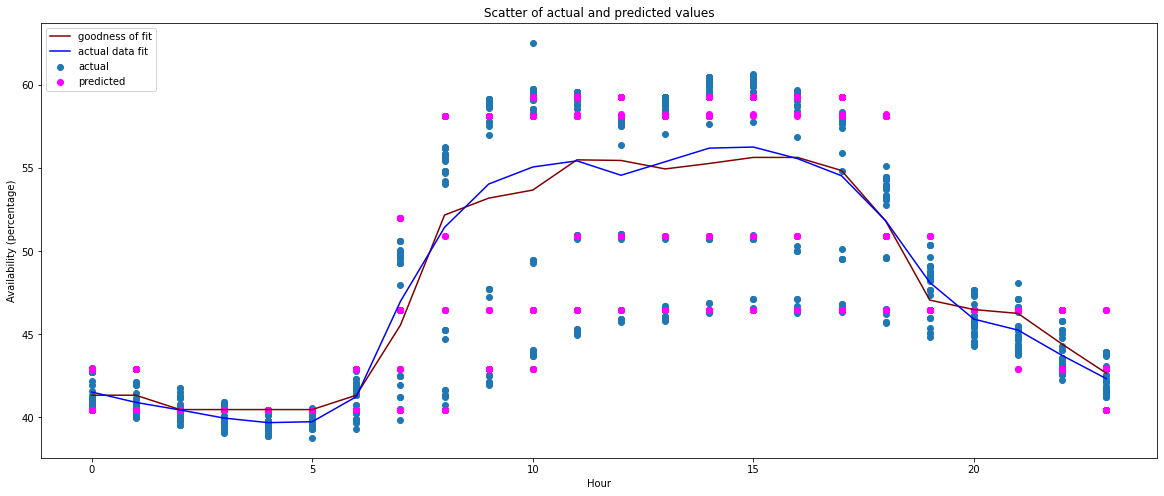

In [252]:
# Plotting
plt.scatter(X_test_arr[:, 0], y_test_arr[:, 0], label = "actual")
plt.scatter(X_test_arr[:, 0], predicted, color='magenta', label='predicted')

predicted_df = pd.DataFrame(columns = ['hour', 'predicted_val'])
predicted_df['hour'] = X_test_arr[:, 0]
predicted_df['predicted_val'] = predicted

predicted_agg = predicted_df.groupby(['hour'], as_index = False)['predicted_val'].mean()

actual_df = pd.DataFrame(columns = ['hour', 'actual_val'])
actual_df['hour'] = X_test_arr[:, 0]
actual_df['actual_val'] = y_test_arr[:, 0]

actual_agg = actual_df.groupby(['hour'], as_index = False)['actual_val'].mean()

plt.plot(predicted_agg['hour'], predicted_agg['predicted_val'], color = "maroon", label = "goodness of fit")
plt.plot(actual_agg['hour'], actual_agg['actual_val'], color = "blue", label = "actual data fit")

plt.title('Scatter of actual and predicted values')
 
# rotating the x-axis tick labels at 30degree
# towards right
# plt.xticks(rotation=30, ha='right')

plt.legend(loc="upper left")

plt.xlabel('Hour')
plt.ylabel('Availability (percentage)')

plt.show()

### Question 2.5

**Final recommendation for the best regression model (out of the 3 methods above) made by choosing a suitable performance metric after hyperparamter tuning.**

We performed hyperparameter tuning for Linear Regression and Support Vector Regression using The GridSearchCV method. As for Decision Tree Regressor, we did hyperparameter tuning by trial and error. The performance metrics we used include R<sup>2</sup> score and Mean Squared Error (MSE). Since the data has been scaled before fitting to any of the models, the MSEs are comparable. 

Below we have summarised the performance metrics for different models.

In [255]:
print("Linear Regression ")
print("R2 Score: ", model_metrics["linreg"]["r2"])
print("Train MSE: ", model_metrics["linreg"]["train_mse"])
print("Test MSE: ", model_metrics["linreg"]["test_mse"])
print("Train - Test MSE Difference: ", model_metrics["linreg"]["test_mse"] - model_metrics["linreg"]["train_mse"])
print("\nSupport Vector Regression ")
print("R2 Score: ", model_metrics["svr"]["r2"])
print("Train MSE: ", model_metrics["svr"]["train_mse"])
print("Test MSE: ", model_metrics["svr"]["test_mse"])
print("Train - Test MSE Difference: ", model_metrics["svr"]["test_mse"] - model_metrics["svr"]["train_mse"])
print("\nDecision Tree Regression ")
print("R2 Score: ", model_metrics["dtr"]["r2"])
print("Train MSE: ", model_metrics["dtr"]["train_mse"])
print("Test MSE: ", model_metrics["dtr"]["test_mse"])
print("Train - Test MSE Difference: ", model_metrics["dtr"]["test_mse"] - model_metrics["dtr"]["train_mse"])

Linear Regression 
R2 Score:  0.9572695484564134
Train MSE:  0.034083834699874006
Test MSE:  0.047587137642422096
Train - Test MSE Difference:  0.01350330294254809

Support Vector Regression 
R2 Score:  0.943766506053293
Train MSE:  0.03371230262263064
Test MSE:  0.06262491782532768
Train - Test MSE Difference:  0.028912615202697042

Decision Tree Regression 
R2 Score:  0.9429323829414074
Train MSE:  0.04172032465273418
Test MSE:  0.06355384625697649
Train - Test MSE Difference:  0.02183352160424231


We note that all three models have train and test MSE that are not too far off thus ensuring that none of the models are overfitting. 

From the above given models, Linear Regression worked the best giving a R2 score of 0.957 and least Test MSE of 0.0476. Morever, the difference between Train MSE and Test MSE is the lowest for linear regression (difference = 0.0135). This comprises our quantitative argument for using Linear Regression.

As for our qualitative arguments, the line graph for Linear Regression visually shows the best fit to the actual carpark_availability of August. This can be inferred by visually inspecting the lines plots for the 3 models. Linear Regression renders a plot with only one mismatched peak at 370 <= hours <= 390 (x-axis) and an overall smooth fit with minimal peaking behaviour. Not only does it perform the best, Linear Regression is among the simplest models used for training. By Occam's Razor, we should always choose the simplest among competing theories, hence Linear Regression is our best choice.

Thank you for reading!